In [1]:
from google.colab import files
files.upload()

Saving amazonfoodreviews100kcleansed.csv to amazonfoodreviews100kcleansed.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [5]:
df = pd.read_csv("amazonfoodreviews100kcleansed.csv")
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cleansed
0,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,negative,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,b'witti littl book make son laugh loud recit c...
1,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,negative,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",b'grew read sendak book watch realli rosi movi...
2,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,negative,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,b'fun way children learn month year learn poem...


In [11]:
df['Score'].value_counts()

negative    84670
positive    15330
Name: Score, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split as tts

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score

In [9]:
from tqdm import tqdm

In [8]:
sorted_data = df.sort_values('Time', axis=0, ascending=True, kind = 'quicksort')
print(sorted_data.shape)
train_and_cv, test = tts(sorted_data, test_size=0.3, random_state=0)
train, cv = tts(train_and_cv, test_size=0.3, random_state=0)
print("Train Data : ", train.shape, "  CV Data : ", cv.shape, "  Test Data : ", test.shape)
print("Test :", test['Time'].iloc[0])
print("CV :",cv['Time'].iloc[0])
print("Train :",train['Time'].iloc[0])
print(train['Text'].iloc[0])
print(cv['Text'].iloc[0])

(100000, 11)
Train Data :  (49000, 11)   CV Data :  (21000, 11)   Test Data :  (30000, 11)
Test : 1158537600
CV : 1235779200
Train : 1298246400
At last, mallomars are available seasonally on Amazon for a reasonable price.  It's great to have them back again (out here, in Colorado).<br /><br />The coating is real chocolate, the marshmallow and cake bottom are great.  The only problem is: how should you eat them?  Bite the marshmallow off, and then eat the bottom?  Or bite them sideways, like a normal cookie?  Awww--too bad, I'll just have to experiment with them more!!
I used to buy this from my local grocery store, but it isn't stocked anymore. I love this stuff, and will buy it here on Amazon until I find another local retailer that carries it!<br /><br />I love the chili crackers in this mix and see that they sell bags that only contain that. I don't know what to buy! AAAAAAAAAGGHH!!


In [21]:
train_label = train['Score']
cv_label = cv['Score']
test_label = test['Score']

In [13]:

def bag_of_words(data):
    bow = CountVectorizer()
    bow = bow.fit(data)
    return bow

In [15]:
from sklearn.preprocessing import Normalizer
# Computing BOW for train, test, cv dataset
bow = bag_of_words(train['cleansed'])
train_bow = bow.transform(train['cleansed'])
cv_bow = bow.transform(cv['cleansed'])
test_bow = bow.transform(test['cleansed'])
train_label = train['cleansed']
cv_label = cv['Score']
test_label = test['Score']
features = np.array(bow.get_feature_names())

print(pd.isna(df['Score']).any())
print(train_bow.shape, train_label.shape)
print(features[0:3])

# Normalize Data
train_bow = Normalizer().fit_transform(train_bow)
cv_bow = Normalizer().fit_transform(cv_bow)
test_bow = Normalizer().fit_transform(test_bow)

False
(49000, 27136) (49000,)
['aaaaaah' 'aaaaaahhhhhyaaaaaa' 'aaaallll']


Trying Multinomial NB on imbalanced Dataset

In [47]:
l = alpha_values = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]
auc_cv=[]
auc_train=[]

for i in tqdm(l):
    clf= MultinomialNB(alpha=i)
    clf = clf.fit(train_bow, train_label)
    # Pedicting probabilities 
    train_probab = clf.predict_proba(train_bow)[:,1]
    cv_probab = clf.predict_proba(cv_bow)[:,1]
    # Computing Area under the curve
    auc_train.append(roc_auc_score(train_label, train_probab))
    auc_cv.append(roc_auc_score(cv_label, cv_probab))
    print("alpha =",i," ------>",auc_cv)

  9%|▉         | 1/11 [00:00<00:04,  2.49it/s]

alpha = 1e-05  ------> [0.866398580056126]


 18%|█▊        | 2/11 [00:00<00:03,  2.49it/s]

alpha = 0.0001  ------> [0.866398580056126, 0.8849521140506761]


 27%|██▋       | 3/11 [00:01<00:03,  2.49it/s]

alpha = 0.001  ------> [0.866398580056126, 0.8849521140506761, 0.9041412932678468]


 36%|███▋      | 4/11 [00:01<00:02,  2.50it/s]

alpha = 0.01  ------> [0.866398580056126, 0.8849521140506761, 0.9041412932678468, 0.9206183307444861]


 45%|████▌     | 5/11 [00:02<00:02,  2.50it/s]

alpha = 0.1  ------> [0.866398580056126, 0.8849521140506761, 0.9041412932678468, 0.9206183307444861, 0.9276295089880681]


 55%|█████▍    | 6/11 [00:02<00:02,  2.49it/s]

alpha = 1  ------> [0.866398580056126, 0.8849521140506761, 0.9041412932678468, 0.9206183307444861, 0.9276295089880681, 0.9038467107526033]


 64%|██████▎   | 7/11 [00:02<00:01,  2.48it/s]

alpha = 10  ------> [0.866398580056126, 0.8849521140506761, 0.9041412932678468, 0.9206183307444861, 0.9276295089880681, 0.9038467107526033, 0.7550780519752878]


 73%|███████▎  | 8/11 [00:03<00:01,  2.50it/s]

alpha = 100  ------> [0.866398580056126, 0.8849521140506761, 0.9041412932678468, 0.9206183307444861, 0.9276295089880681, 0.9038467107526033, 0.7550780519752878, 0.6866185173238106]


 82%|████████▏ | 9/11 [00:03<00:00,  2.50it/s]

alpha = 1000  ------> [0.866398580056126, 0.8849521140506761, 0.9041412932678468, 0.9206183307444861, 0.9276295089880681, 0.9038467107526033, 0.7550780519752878, 0.6866185173238106, 0.6555070475114736]


 91%|█████████ | 10/11 [00:04<00:00,  2.49it/s]

alpha = 10000  ------> [0.866398580056126, 0.8849521140506761, 0.9041412932678468, 0.9206183307444861, 0.9276295089880681, 0.9038467107526033, 0.7550780519752878, 0.6866185173238106, 0.6555070475114736, 0.6407784243315383]


100%|██████████| 11/11 [00:04<00:00,  2.50it/s]

alpha = 100000  ------> [0.866398580056126, 0.8849521140506761, 0.9041412932678468, 0.9206183307444861, 0.9276295089880681, 0.9038467107526033, 0.7550780519752878, 0.6866185173238106, 0.6555070475114736, 0.6407784243315383, 0.6384334449141008]


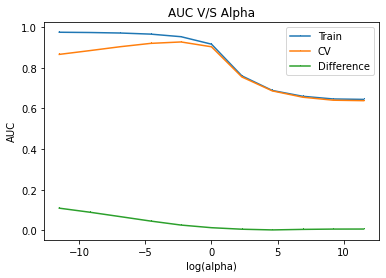

In [48]:
auc_train = np.array(auc_train)
auc_cv = np.array(auc_cv)
auc_diff = auc_train-auc_cv
# Plotting curve of different values of alpha between auc and alpha, to determine best alpha
best_alpha = l[np.argmax(auc_cv)]
plt.plot(np.log(l), auc_train, label = 'Train',marker=',')
plt.plot(np.log(l), auc_cv, label='CV',marker=',')
plt.plot(np.log(l), auc_diff, label='Difference',marker=',')
plt.grid()
plt.xlabel('log(alpha)')
plt.ylabel('AUC')
plt.legend()
plt.title("AUC V/S Alpha")
plt.grid()
plt.legend()
plt.show()

In [49]:
clf.feature_log_prob_

array([[-10.20868897, -10.20869007, -10.20868917, ..., -10.20868858,
        -10.20868886, -10.20868858],
       [-10.20862995, -10.20862964, -10.20862995, ..., -10.20862995,
        -10.20862995, -10.20862995]])

In [50]:
test_bow.shape

(30000, 27136)

In [51]:
for i in range(30000):
  classtag = clf.predict(test_bow[i,:].todense())[0]
  if classtag == 'positive':
    print(i,classtag)
else:
  print('no positive')

no positive


  9%|▉         | 1/11 [00:00<00:03,  2.53it/s]

alpha = 1e-05  ------> [0.866398580056126]


 18%|█▊        | 2/11 [00:00<00:03,  2.52it/s]

alpha = 0.0001  ------> [0.866398580056126, 0.8849521140506761]


 27%|██▋       | 3/11 [00:01<00:03,  2.50it/s]

alpha = 0.001  ------> [0.866398580056126, 0.8849521140506761, 0.9041412932678468]


 36%|███▋      | 4/11 [00:01<00:02,  2.46it/s]

alpha = 0.01  ------> [0.866398580056126, 0.8849521140506761, 0.9041412932678468, 0.9206183307444861]


 45%|████▌     | 5/11 [00:02<00:02,  2.47it/s]

alpha = 0.1  ------> [0.866398580056126, 0.8849521140506761, 0.9041412932678468, 0.9206183307444861, 0.9276295089880681]


 55%|█████▍    | 6/11 [00:02<00:02,  2.49it/s]

alpha = 1  ------> [0.866398580056126, 0.8849521140506761, 0.9041412932678468, 0.9206183307444861, 0.9276295089880681, 0.9038467107526033]


 64%|██████▎   | 7/11 [00:02<00:01,  2.49it/s]

alpha = 10  ------> [0.866398580056126, 0.8849521140506761, 0.9041412932678468, 0.9206183307444861, 0.9276295089880681, 0.9038467107526033, 0.7550780519752878]


 73%|███████▎  | 8/11 [00:03<00:01,  2.50it/s]

alpha = 100  ------> [0.866398580056126, 0.8849521140506761, 0.9041412932678468, 0.9206183307444861, 0.9276295089880681, 0.9038467107526033, 0.7550780519752878, 0.6866185173238106]


 82%|████████▏ | 9/11 [00:03<00:00,  2.50it/s]

alpha = 1000  ------> [0.866398580056126, 0.8849521140506761, 0.9041412932678468, 0.9206183307444861, 0.9276295089880681, 0.9038467107526033, 0.7550780519752878, 0.6866185173238106, 0.6555070475114736]


 91%|█████████ | 10/11 [00:04<00:00,  2.50it/s]

alpha = 10000  ------> [0.866398580056126, 0.8849521140506761, 0.9041412932678468, 0.9206183307444861, 0.9276295089880681, 0.9038467107526033, 0.7550780519752878, 0.6866185173238106, 0.6555070475114736, 0.6407784243315383]


100%|██████████| 11/11 [00:04<00:00,  2.49it/s]

alpha = 100000  ------> [0.866398580056126, 0.8849521140506761, 0.9041412932678468, 0.9206183307444861, 0.9276295089880681, 0.9038467107526033, 0.7550780519752878, 0.6866185173238106, 0.6555070475114736, 0.6407784243315383, 0.6384334449141008]


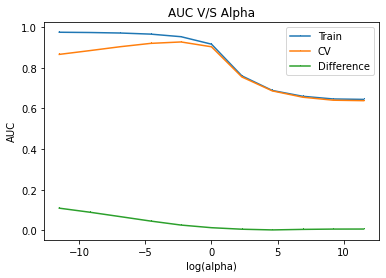

In [52]:
from sklearn.naive_bayes import ComplementNB

l = alpha_values = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]
auc_cv=[]
auc_train=[]

for i in tqdm(l):
    clf= ComplementNB(alpha=i)
    clf = clf.fit(train_bow, train_label)
    # Pedicting probabilities 
    train_probab = clf.predict_proba(train_bow)[:,1]
    cv_probab = clf.predict_proba(cv_bow)[:,1]
    # Computing Area under the curve
    auc_train.append(roc_auc_score(train_label, train_probab))
    auc_cv.append(roc_auc_score(cv_label, cv_probab))
    print("alpha =",i," ------>",auc_cv)

auc_train = np.array(auc_train)
auc_cv = np.array(auc_cv)
auc_diff = auc_train-auc_cv
# Plotting curve of different values of alpha between auc and alpha, to determine best alpha
best_alpha = l[np.argmax(auc_cv)]
plt.plot(np.log(l), auc_train, label = 'Train',marker=',')
plt.plot(np.log(l), auc_cv, label='CV',marker=',')
plt.plot(np.log(l), auc_diff, label='Difference',marker=',')
plt.grid()
plt.xlabel('log(alpha)')
plt.ylabel('AUC')
plt.legend()
plt.title("AUC V/S Alpha")
plt.grid()
plt.legend()
plt.show()

In [53]:
for i in range(30000):
  classtag = clf.predict(test_bow[i,:].todense())[0]
  if classtag == 'positive':
    print(i,classtag)
else:
  print('no positive')

8674 positive
14797 positive
18933 positive
19342 positive
25943 positive
no positive
